# GG4257 - Urban Analytics: A Toolkit for Sustainable Urban Development
## Lab Assignment No 2 

# Assignment Instructions

For this assignment, you are required to create a **report** that includes your approach to the challenges presented in practical **Labs 5, 6, and 7**. The report should be in the form of a **Jupyter Notebook** and should contain a **GitHub repository** where all the code used can be replicated to achieve the same results. You can use the same repository you shared during Assignment No 1, but describe where the new labs will be included. 

**General Considerations:**

1. Include the coursework cover page available in the Virtual Office as the initial section of your report, with all relevant information and the GitHub repository link, but exclude the word count.  
   
2. You can structure your report as you prefer, but try to be consistent, organized and clear. You can use the same repository you shared during Assignment No 1, but describe where the new labs will be included. 
   
3. To avoid exceeding the size limit of a GitHub repository, it may not be possible to push a notebook containing all outcomes. To address this issue, please include a screenshot of the last outcome of each challenge using the description cells in the notebook. Once included, clear all outcomes to reduce the notebook's size. I will reproduce the code and compare the images you provided with the outcomes I obtained while running your code to ensure that I get the same results.
  
4. Once again, you can structure this report in any way you want. Creating another creates a single, large notebook with multiple sections, or you can follow the nested notebook with folders structure I provided during the last Assigment. There will be marks given for the structure, coherence, consistency, and clarity of your report 
   
5. **Descriptions and Coding Comments**: Each code cell should have comments that describe what the code is doing, any issues or barriers, citations, and other relevant information. Use markdown cells where you explain the problem you are addressing and how you did it (here, you can add *screenshots* from the final outcomes). Some challenges only require you to answer questions and provide insights. This will help the marker evaluate your understanding of the code, the outcomes, and the  problem you have solved.
   
6. **Data**: As you already know, the challenges usually come with data. Once again, ensure you add a clear restructure and description on how to get large data or any data you can't push into the repo. For larger datasets, you can state that the data will be available in a public folder such as *Google Drive* or *One Drive*. Then, provide instructions on where to add or locate the data to replicate the results properly.

   >It is your responsibility to ensure the reproducibility of the repo and notebook. Make sure everything is clearly described and available. This is a typical workflow for most spatial data science projects, particularly in urban analytics.

8. The length of the report is not restricted, as you may need screenshots, descriptions, and code.
   
# Example of report structure and the challenges that must be included.

- Cover Page
- Introduction  - How to replicate the code and get the required data
- Lab No 5: Intro to Networks - 2 Challenges
- Lab No 6: Geodemographics: 1 Challenges
- Lab No 7: Spatial Microsimulation: 3 Challenges
- Final Remarks(limitations, barriers, and any additional comments)


# Cover Page
## Student ID: 200024980
## Module Code: GG4257
## Module Title: Urban Analytics: A Toolkit for Sustainable Urban Development
## Assignment: Labs 5-7 and Proposal 
## Degree Programme: International Relations and Geography 
## Deadline Date: 21/03/24
In submitting this assignment I hereby confirm that

I have read the University's statement on Good Academic Practice; that the following work is my own work; and that significant academic debts and borrowings have been properly acknowledged and referenced.


# Introduction
This section introduces how to replicate the code and how to get the required data. 

All the data required to run this notebook locally will be placed in a Google Drive folder. In addition, screenshots of essential maps and graphs will be included in this folder and accessed throughout the notebook to save processing time.

Moreover, the notebook will also be published on my Github Repo under the Assignment 1 folder. In case you would like to run this locally, I will also upload the environment file (.yml) to the repo, as well as the link to the Google Drive folder in the read me file.

In the script below, all the paths to the data assume that the file is in a folder called 'data'. 

## [Google Drive Folder with Data](https://drive.google.com/drive/folders/13wSOHnQqmqMQAJ4uYTk5HldfkwJNOs0b?usp=drive_link)
## [My Github Repo](https://github.com/issyollie/Assignment_2)

# Lab No. 5: Intro to Networks

## Challenge 1
It's time for you to apply everything you learned by analyzing a case study of GitHub's collaborator network data.

- **Data**: `github_users.p` (avaliable in Moodle)

> This dataset is a GitHub user collaboration network. As you already know, GitHub is a social coding site where users can collaborate on code repositories. In this network, nodes are users, and edges indicate that two users are collaborators on at least one GitHub repository.

1. Read the GitHub network dataset.
2. Describe using the basic functions of the graph's size. Explore nodes and edges. Provide how many nodes and edges are present in the network
3. Calculate the **degree centrality** of the GitHub collaboration network G. Using the .values() method of the network (e.g. G), extract the degree centrality values and convert them into a list. Then, plot a histogram to visualize the distribution of node degrees in the network.
4. Make a subset of the initial network (e.g. Gh_sub), where you include at least five nodes and their corresponding edges. Experiment with multiple nodes so you have a graph with enough edges to work on.
5. Plot the subset graph created.
6. Now calculate another relevant measure of the network -- **betweenness centrality**. Plot the betweenness centrality distribution of the subset you created. Tip: Same steps from the previous step, but use `nx.betweenness_centrality()`
7. Plot the Matrix, Arc and Circos from the subset.

### 1. Reading the GitHub network dataset 

In [ ]:
import pickle

with open('data/github_users.p', 'rb') as x:
    git = pickle.load(x)
git

### 2. Describing the data
Describe using the basic functions of the graph's size. Explore nodes and edges. Provide how many nodes and edges are present in the network

In [ ]:
print(len(git))# Returns the size of the graph `T`, 
print(type(git.nodes())) # Returns the type of `T.nodes()`
print(list(git.edges(data=True))[-1]) # Reads the attributes associated with the last element of the edges list. 
print(list(git.nodes(data=True))[0]) # Reads the attributes associated with the firts element of the node list.
print(type(list(git.edges(data=True))[-1][2])) # Provides the type of data 

Looks like the graph is over 56,000 entries in size. Now, let's try to see how many nodes and edges there are. 

In [ ]:
# Here, I can use .edges/.nodes and len() to print the number of nodes and edges 
print(len(list(git.edges)))
print(len(list(git.nodes)))

In [ ]:
# The outcome of this is extremely large - it's all the connections between users in the data. 
list(git.edges)

There are 72900 edges and 56519 nodes. This suggests that some nodes have multiple connections, which could be a sign that this is best represented by a multi-directional graph.

### 3. Degree Centrality
Calculate the **degree centrality** of the GitHub collaboration network G. Using the .values() method of the network (e.g. G), extract the degree centrality values and convert them into a list. Then, plot a histogram to visualize the distribution of node degrees in the network.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
nx.number_of_selfloops(git)
# There are no self-loops, which makes sense, considering the structure of Github

In [ ]:
# Creating an empty graph called git_network
git_network = nx.Graph()
git_network.add_edges_from(git.edges) # Adding the edges from git.edges

# This line here calculates the degree centrality for all the notes in "git" and stores them in a dictionary (called degree-centrality)
degree_centrality = nx.degree_centrality(git_network)

# Extracting degree centrality values as a list
centrality_list = list(degree_centrality.values())

# Print the degree centrality list
print(centrality_list) # This outcome is quite long, as a note. 

In [ ]:
# I can use .hist to create a histogram based on the matplotlib library. 
plt.hist(centrality_list, bins=10) 

# Setting labels and title
plt.xlabel("Degree Centrality")
plt.ylabel("Number of Nodes")
plt.title("Distribution of Node Degrees")
plt.show

It looks like most nodes have a very low degree centrality. Fewer than a thousand have around a 0.01 centrality. Very few have over 0.03 degree centrality. 

### 4. Subsetting the data 
Make a subset of the initial network (e.g. Gh_sub), where you include at least five nodes and their corresponding edges. Experiment with multiple nodes so you have a graph with enough edges to work on.

In [ ]:
subset_from_git=git.edges(['u264','u233', 'u9965', 'u42000', 'u55', 'u7534'], data=True) # I chose these at random. 
subset_from_git

In [ ]:
#Creating an empty graph, then adding in the data
git_sub = nx.DiGraph()
git_sub.add_edges_from(subset_from_git) #Adding the list from the subset of nodes.
len(git_sub)

 ### 5. Plot the subset graph created.

In [ ]:
plt.figure(figsize=(8, 8))
nx.draw(git_sub, with_labels=True)
plt.show()

### 6. Calculating betweenness centrality
Now calculate another relevant measure of the network -- **betweenness centrality**. Plot the betweenness centrality distribution of the subset you created. Tip: Same steps from the previous step, but use `nx.betweenness_centrality()`

In [ ]:
# Creating an empty graph called git_network
git_network_subset = nx.Graph()
git_network_subset.add_edges_from(subset_from_git) # Adding the edges from git.edges

# This line here calculates the betweenness centrality for all the notes in "git" and stores them in a dictionary (called betweenness list)
betweenness_centrality = nx.betweenness_centrality(git_network_subset)

# Extracting degree centrality values as a list
betweenness_list = list(betweenness_centrality.values())

# Print the degree centrality list
#print(betweenness_list) # This outcome is quite long, as a note. 


In [ ]:
# I can use .hist to create a histogram based on the matplotlib library. 
plt.hist(betweenness_list, bins=5) 

# Setting labels and title
plt.xlabel("Betweenness Centrality")
plt.ylabel("Number of Nodes")
plt.title("Distribution of Betweenness Centrality")
plt.show

In [ ]:
# I can also plot this 
import networkx as nx
import matplotlib.pyplot as plt

# Making a graph as before. 
git_network_subset = nx.Graph()
git_network_subset.add_edges_from(subset_from_git)

# Getting betweenness centrality 
betweenness_centrality = nx.betweenness_centrality(git_network_subset)

# Plot the graph
pos = nx.spring_layout(git_network_subset)
nx.draw(git_network_subset, pos, with_labels=True, node_size=700, node_color='skyblue')
plt.title('Graph git_network_subset with Betweenness Centrality')
plt.show()

Looks like the user 7525 has a very high betweenness centrality. While it is hard to see the overlapping users in the other section, it does reveal that the majority of users have connections with only a handful of major repos. Additionally, there are also outliers that don't have any connections with others. 

### 7. Plot the Matrix, Arc and Circos from the subset.

#### 7.1 Plotting the Matrix 

In [ ]:
#Now the same but with the subset from twitter data.
import nxviz as nv
nv.MatrixPlot(git_sub)
plt.show()

#### 7.2 Plotting the Arc

In [ ]:
nv.ArcPlot(git_sub)
plt.show()

#### 7.3 Plotting the Circos

In [ ]:
nv.CircosPlot(git_sub)
plt.show()

These graphs reflect that there are three major git users that most users have interactions with. 

# Challenge 2

This challenge is about OSMnx. You will explore and analyze a city's street network using the OSMnx Python library.

1. Use OSMnx to download the street network of a city of your choice. You can specify the city name, BBox or a Dict.
2. Calculate basic statistics for the street network, such as the number of nodes, edges, average node degree, etc.
3. Use OSMnx to plot the street network. Customize the plot to make it visually appealing, including node size, edge color. See the potential options here: https://osmnx.readthedocs.io/en/stable/user-reference.html#module-osmnx.plot
4. Utilize the routing capabilities of OSMnx to find the shortest path between two points in the street network. Plot the route on top of the street network.
5. Calculate the centrality measures (e.g., degree centrality and betweenness_centrality) for nodes in the street network.
6. Create the figure-groud from the selected city
7. Create interactive maps to plot nodes, edges, nodes+edges and one of the centrality measures.
8. Export the street network to a GeoPackage (.gpkg) file. Ensure that the exported file contains both node and edge attributes. Demonstrate that the new GeoPackage can be used and read in Python using any of the libraries we have seen in the class to create a simple and interactive map.
9. Finally, use OSMnx to extract other urban elements (e.g., buildings, parks) and plot them.

## 1. Using OSMnx: Dublin 
Use OSMnx to download the street network of a city of your choice. You can specify the city name, BBox or a Dict.

In [ ]:
# I'd like to see the street networks in Dublin's city centre, so I've chosen a one_mile range from the Ha'Penny bridge. 
import osmnx as ox
dublin_city_centre = (53.346400, -6.263143)
one_mile = 1609.34  # meters
G_dub = ox.graph_from_point(dublin_city_centre, dist=one_mile, network_type="drive") 
fig, ax = ox.plot_graph(G_dub, node_size=0)

In [ ]:
# Conversion to a gdf
import osmnx as ox
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

# Using graph to gdfs
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G_dub)
# Now there is a geodataframe (G_dub) that has the edges and the nodes. 

## 2. Calculating Basic Statistics 
Includes number of nodes, edges, average node degree, and so on. 

In [ ]:
# Finding the area in meters of the map 
warnings.filterwarnings('ignore')
G_dub_proj = ox.project_graph(G_dub)
nodes_proj = ox.graph_to_gdfs(G_dub_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

In [ ]:
# Basic statistics of the map 
ox.basic_stats(G_dub_proj, area=graph_area_m, clean_int_tol=15)

In [ ]:
# Here, I can use .edges/.nodes and len() to print the number of nodes and edges; this is already included above with n and m, but this will make it extra clear. 
print(len(list(G_dub.edges)))
print(len(list(G_dub.nodes)))

## 3. Plotting the Street Network 
Use OSMnx to plot the street network. Customize the plot to make it visually appealing, including node size, edge color. 
https://osmnx.readthedocs.io/en/stable/user-reference.html#module-osmnx.plot 

In [ ]:
# Customizing the plot using matplotlib
fig, ax = ox.plot_graph(G_dub,
                         figsize=(10, 10),  # Adjusting figure size 
                         node_size=2,  # Increased the node size to 2 
                         edge_color="red",  # Made all the edges red for contrast
                         edge_linewidth=0.5,  # Made all the edges 0.5 thickness 
                         show=False)  # I'd like to add a title later. 

plt.title("Street Network around Ha'Penny Bridge, Dublin Within One Mile")  # Adding a title

plt.show()  # Displaying the plot

## 4. Shortest Route 
Utilize the routing capabilities of OSMnx to find the shortest path between two points in the street network. Plot the route on top of the street network.


From a visit to Dublin, I'd like to know the shortest route to take from the national gallery of Ireland and the entrance to a park called Croppy Acre. I found these coordinates using bbox. 
1. Coordinates for National Gallery (-6.252697,53.340813) 
2. Coordinates for Croppy Acre Park (-6.285219,53.347810)

In [ ]:
# Using add_edge_speeds and travel times
G_dub = ox.speed.add_edge_speeds(G_dub)
G_dub = ox.speed.add_edge_travel_times(G_dub)

In [ ]:
# getting the nearest network nodes to two lat/lng points with the distance module
orig = ox.distance.nearest_nodes(G_dub, X=-6.252697, Y=53.340813) # National Gallery 
dest = ox.distance.nearest_nodes(G_dub, X=-6.285219, Y=53.347810) # Croppy Acre Park

In [ ]:
# finding the shortest path between nodes, minimizing travel time, then plotting it
route = ox.shortest_path(G_dub, orig, dest, weight="travel_time")
fig, ax = ox.plot_graph_route(G_dub, route, node_size=0)

## 5. Centrality Measures
Calculate the centrality measures (e.g., degree centrality and betweenness_centrality) for nodes in the street network.

### 5.1 Visualising Closeness Centrality 

In [ ]:
# converting the graph to line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G_dub))
nx.set_edge_attributes(G_dub, edge_centrality, "edge_centrality")

In [ ]:
# coloring the edges in original graph with closeness centralities from line graph
ec = ox.plot.get_edge_colors_by_attr(G_dub, "edge_centrality", cmap="inferno")
fig, ax = ox.plot_graph(G_dub, edge_color=ec, edge_linewidth=2, node_size=0)

### 5.2 Calculating Betweenness Centrality 

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# These lines here calculate the betweenness centrality for all the nodes in "G_dub" and stores them in a dictionary (called betweenness list)
betweenness_centrality = nx.betweenness_centrality(G_dub)

# Extracting betweenness_centrality values as a list
betweenness_list = list(betweenness_centrality.values())

# Print the betweenness centrality list
#print(betweenness_list) # This outcome is quite long, as a note, so feel free to remove the hashtag if you wish. 

### 5.3 Visualising Betweenness Centrality 

In [ ]:
# converting the graph to line graph so edges become nodes and vice versa
betweenness_centrality = nx.betweenness_centrality(nx.line_graph(G_dub))
nx.set_edge_attributes(G_dub, betweenness_centrality, "betweenness_centrality")
# coloring the edges in original graph with betweenness centralities from line graph
ec = ox.plot.get_edge_colors_by_attr(G_dub, "betweenness_centrality", cmap="inferno")
fig, ax = ox.plot_graph(G_dub, edge_color=ec, edge_linewidth=2, node_size=0)

### 5.4 Calculating Degree Centrality

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# This line her|e calculates the degree centrality for all the nodes in "G_dub" and stores them in a dictionary (called degree-centrality)
degree_centrality = nx.degree_centrality(G_dub)

# Extracting degree centrality values as a list
centrality_list = list(degree_centrality.values())

# Print the degree centrality list
print(centrality_list) # This outcome is quite long, as a note. 

### 5.5 Visualising Degree Centrality

In [ ]:
# converting the graph to line graph so edges become nodes and vice versa
degree_centrality = nx.degree_centrality(nx.line_graph(G_dub))
nx.set_edge_attributes(G_dub, degree_centrality, "degree_centrality")
# coloring the edges in original graph with degree centralities from line graph
ec = ox.plot.get_edge_colors_by_attr(G_dub, "degree_centrality", cmap="inferno")
fig, ax = ox.plot_graph(G_dub, edge_color=ec, edge_linewidth=2, node_size=0)

## 6. Figure_ground 
 Create the figure-ground from the selected city

In [ ]:
from IPython.display import Image
# configure the inline image display
img_folder = "images"
extension = "png"
size = 300
dpi = 40

In [ ]:
street_widths = { # Assigning the widths of edges based on attribute 
    "footway": 0.5,
    "steps": 0.5,
    "pedestrian": 0.5,
    "path": 0.5,
    "track": 0.5,
    "service": 2,
    "residential": 3,
    "primary": 5,
    "motorway": 6,
}
place = "dublin"
point = (53.346400, -6.263143)
fp = f"./{img_folder}/{place}.{extension}"
fig, ax = ox.plot_figure_ground(
    point=point,
    filepath=fp,
    network_type="all",
    street_widths=street_widths,
    dpi=dpi,
    save=True,
    show=False,
    close=True,
)
Image(fp, height=size, width=size)

## 7. Interactive Mapping 
 Create interactive maps to plot nodes, edges, nodes+edges and one of the centrality measures.

### 7.1 Interactive Mapping: Nodes 

In [ ]:
# explore graph nodes interactively, with different basemap tiles
nodes = ox.graph_to_gdfs(G_dub, edges=False)
nodes.explore(tiles="cartodbpositron", marker_kwds={"radius": 8})

### 7.2 Edges 

In [ ]:
# explore graph edges interactively, with a simple one-liner
ox.graph_to_gdfs(G_dub, nodes=False).explore()

### 7.3 Nodes and Edges 

In [ ]:
# explore nodes and edges together in a single map
nodes, edges = ox.graph_to_gdfs(G_dub)
m = edges.explore(color="skyblue", tiles="cartodbdarkmatter")
nodes.explore(m=m, color="yellow", marker_kwds={"radius": 6})

### 7.4 Betweenness Centrality Measure 

In [ ]:
# explore graph nodes interactively, colored by betweenness centrality
nx.set_node_attributes(G_dub, nx.betweenness_centrality(G_dub, weight="length"), name="bc")
nodes = ox.graph_to_gdfs(G_dub, edges=False)
nodes.explore(tiles="cartodbdarkmatter", column="bc", marker_kwds={"radius": 8})

This is interesting; it seems as though the nodes with the highest betweenness centrality are near the bridges; this makes sense because these are the only points where one can cross te river that flows through Dublin. The slightly more residential areas have a lower betweenness centrality.

## 8. Exporting to a .gpkg
Export the street network to a GeoPackage (.gpkg) file. Ensure that the exported file contains both node and edge attributes. Demonstrate that the new GeoPackage can be used and read in Python using any of the libraries we have seen in the class to create a simple and interactive map.

In [ ]:
# Save graph to disk as geopackage (for GIS)
ox.save_graph_geopackage(G_dub, filepath="data/dublinnetwork.gpkg")

In [ ]:
import geopandas as gpd

# Read the GeoPackage file into a GeoDataFrame
gdf_nodes, gdf_edges = gpd.read_file("data/dublinnetwork.gpkg", layer="nodes"), gpd.read_file("data/dublinnetwork.gpkg", layer="edges")

In [ ]:
# Mapping both the edges and the nodes into one map using .explore
m = gdf_edges.explore(color="red", tiles="cartodbdarkmatter")
gdf_nodes.explore(m=m, color="skyblue", marker_kwds={"radius": 6})

## 9. Extracting urban elements 
Finally, use OSMnx to extract other urban elements (e.g., buildings, parks) and plot them.


Is a Python package to download, model, analyze, and visualize street networks and other geospatial features from OpenStreetMap. You can download and model walking, driving, or biking networks with a single line of code then easily analyze and visualize them. You can just as easily work with urban amenities/points of interest, building footprints, transit stops, elevation data, street orientations, speed/travel time, and routing.[1]
get all building footprints in some neighborhood
[1]:https://geoffboeing.com/2016/11/osmnx-python-street-networks/

In [ ]:
# Let's try for the buildings 
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

# Defining the point of interest (ie ha'penny bridge)
dublin_city_centre = (53.346400, -6.263143)
one_mile = 1609.34  # meters

# Extracting the building footprints within the one mile location of the ha'penny bridge
building_footprints = ox.geometries_from_point(
    dublin_city_centre,
    tags={"building": True},
    dist=one_mile,
)

# Plotting the road network graph
G_dub = ox.graph_from_point(dublin_city_centre, dist=one_mile, network_type="drive")
fig, ax = ox.plot_graph(G_dub, node_size=0, show=False)

# Plotting the building footprints using .plot
building_footprints.plot(ax=ax, facecolor='yellow', alpha=1) # Changed the color and the opacity

# Show the plot
plt.show()

# Lab Workbook No 6: Geodemographics

## Challenge 1: Geodemographic Classification

In this challenge, you will replicate the process of creating a geodemographic classification using the k-means clustering algorithm. Please select any city in the UK except London, Liverpool, or Glasgow. The main goal is to generate a meaningful and informative classification that captures the diversity of areas in your dataset using the census data ( For England, you can try to use the 2021 or 2011 census, and for Scotland, you need to use the 2011 census data) 

1. Define the main goal for the geodemographic classification (marketing, retail and service planning). 
2. Look for census data from the selected city for which you would like to generate the geodemographic classification.
3. The census data at the Output Area OA level. Select multiple topics of at least four topics (socio-demographics, economics, health, and so on). Describe your topic selection accordingly based on the goal of your geodemographic classification. For example, if your geodemographics are related to marketing, Economic variables might be the appropriate selection. 
4. Identify the variables that will be crucial for effectively segmenting neighbourhoods. Evaluate how this choice may impact the classification results, including a DEA analysis.
5. Prepare, adjust or clean the dataset addressing any missing values or outliers that could distort the clustering results.
6. Include standardisation between areas and variables. Make an appropriate analysis and adjust the variable selection accordingly for any multicollinearity.
7. Utilize the k-means clustering algorithm to create a classification based on the selected variables.
8. Define the optimum number of clusters (i.e., using the Elblow method). Experiment with different values of k.
9. Evaluate your cluster groups (e.g., using PCA) and interpret your cluster centres. Describe your results and repeat the process to adjust the variable selection and cluster groups to provide more meaningful results for your geodemographic goal. Interpret the characteristics of each cluster. What demographic patterns or similarities are prevalent within each group?
10. Map the final cluster groups
11. Finish the analysis by naming the final clusters and plotting a final map that includes the census values and the provided names.
12. Finally, acknowledge the subjective nature of classification and make analytical decisions to produce an optimum classification for your specific purpose. Reflect on the challenges and insights gained during the classification process. Ensure you document your analytical decisions and the rationale behind any important decision. Once your geodemographics are constructed, describe the potential use cases for the geodemographic classification you have built based on your initial goal

### 1. Defining goals

A potential use case for geodemographic classification is advertising. Businesses can target both advertising locations and formats when they can identify specific segments of the population that meet certain criteria. For example, a brand advertising cologne might be interesting in finding out where there is a high concentration of young people, particularly men of a certain socio-economic status. Therefore, some key considerations will be age, sex, the type of households people are living in, availability of a car, health, and language, for example. This will inform the wording, placement, and type of product advertised to Birmingham's population. 

In this hypothetical scenario, I will analyse the geodemographics for Birmingham, which is Britain's second largest city. 

### 2. Census Data Finding 
Look for census data from the selected city for which you would like to generate the geodemographic classification.

I found bulk census data for Output Areas in England based on the 2021 census from [NOMIS](https://www.nomisweb.co.uk/sources/census_2021_bulk). I then downloaded the data for the variables below as csv files. 

Additionally, I found the output area classification shapefile for the entire UK from the following source: https://data.cdrc.ac.uk/dataset/output-area-classification-2011#data-and-resources. I also used local planning authority boundaries from a previously used shapefile from Lab No 2. 

### 3. Selecting Topics 
The census data at the Output Area OA level. Select multiple topics of at least four topics (socio-demographics, economics, health, and so on). Describe your topic selection accordingly based on the goal of your geodemographic classification. For example, if your geodemographics are related to marketing, Economic variables might be the appropriate selection.

* TS003	Household composition
* TS029	Proficiency in english
* TS008	Sex
* TS030 Religion
* TS063	Occupation
* TS045 Car or van availability
* TS046	Central heating
* TS067	Highest level of qualification
* TS037	General health
* TS066	Economic activity status
* TS007A Age by five-year age bands (not reproduced for output area by single year bands)
* TS002	Legal partnership status
* TS025	Household language

As a note, some relevant information such as age by single year bands and participation in the UK military were not available for output areas, which reflects some challenges of using census data. A way around this is to apply that data for a higher level of spatial classification, but the level of depth and insight is diminished as result. Therefore, I decided to leave those factors out of the analysis or replaced them with proxies (such as age by five year bands). 

In [ ]:
# Merging the CSV files
import pandas as pd
import os

csv_directory = "data"

# We need a list of all CSV files in the folder
csv_files = [file for file in os.listdir(csv_directory) if file.endswith(".csv")]

# An empty DataFrame to store the merged data
merged_data = pd.DataFrame()

# Loop through each CSV file
for csv_file in csv_files:
    csv_path = os.path.join(csv_directory, csv_file) # We create a consistent path
    df_csv = pd.read_csv(csv_path, low_memory=False) #read each file
    # Concatenate/Merge all columns, there is a pitfall here, you will get a duplicate oa_code from all csv files.
    merged_data = pd.concat([merged_data, df_csv], axis=1)

# Save the merged dataset. You might want to do some pre-processing.
merged_data.to_csv("data/merged_census_data.csv", index=False)

In [ ]:
# Defining the bounds of Birmingham 
import geopandas as gpd
UK_LPA = "data/LAP_2021/LPA_MAY_2021_UK_BUC_V2.shp" # This is the shapefile for all the local planning authorities in the UK
gdf_UK_LPA = gpd.read_file(UK_LPA) # Reading it into a geodataframe from the shapefile
birmingham_lpa_gdf = gdf_UK_LPA[gdf_UK_LPA.LPA21NM == "Birmingham LPA"] # This filters the LPAs by name, specifically Birmingham. 

# Defining the output areas in UK 
UK_OA = "data/infuse_oa_lyr_2011_clipped/infuse_oa_lyr_2011_clipped.shp" # This is the shapefile for all the output areas in the UK 
UK_OA = gpd.read_file(UK_OA) # Again, conversion to a geodataframe 

In [ ]:
# Clipping the OAs to Birmingham city using .clip 
birmingham_oa = gpd.clip(UK_OA, birmingham_lpa_gdf)

In [ ]:
birmingham_oa.to_file("data/birmingham_oa.shp", driver='ESRI Shapefile') # Saving it as a shapefile to the folder 

In [ ]:
import geopandas as gpd
birmingham_oa = "data/birmingham_oa.shp"
birmingham_oa = gpd.read_file(birmingham_oa)
birmingham_oa.explore() #E00044983 

In [ ]:
birmingham_oa.head()

In [ ]:
import pandas as pd
import geopandas as gpd


birmingham_oa = "data/birmingham_oa.shp"
birmingham_oa = gpd.read_file(birmingham_oa)

csv_path = "data/merged_census_data.csv"
csv_data = pd.read_csv(csv_path, low_memory=False)

# Merge the GeoDataFrame with the DataFrame based on the oa_code
merged_data = birmingham_oa.merge(csv_data, left_on='geo_code', right_on='geography code', how='left')

# You could save the merged data to a new shapefile, but I will skip this now
# but you could do it, in case you need just to read the data you have merged., and avoid
# the previous cell
# merged_data.to_file('data_lab6/glasgow_census_data.shp', index=False)

In [ ]:
list(merged_data.columns)

In [ ]:
merged_data.shape

### 4. Identifying variables 
Identify the variables that will be crucial for effectively segmenting neighbourhoods. Evaluate how this choice may impact the classification results, including a DEA analysis.
A basic assumption is that for an advertising agency, there main characteristics for a product related to cologne or hygiene will be dependent on factors such as ethnicity, language, sex, age, employment (as a proxy for income status and type), and religion. At this point, I will conduct summary analyses and a DEA analysis to evaluate how these variables will affect the classification results. 

#### 4.1 Summary Analysis 
The summary analysis will include some important variables, such as unemployment numbers, religion, and proficiency in English. 

In [ ]:
merged_data['Economic activity status: Economically inactive.1'].describe()

In [ ]:
merged_data['Religion: Christian'].describe()

This means that the average number of Christian adherents is 120 per output area of Birmingham. While this doesn't say anything about where they are spatially distributed, it does say that there is a wide range in number of Christian adherents, ranging from 3 to 388. 

In [ ]:
merged_data['Proficiency in English language: Main language is not English (English or Welsh in Wales): Cannot speak English.1'].describe()
# Looks like there are very few numbers of people who cannot speak English at all; however, an index that combined the 
# characteristics of no english, limited english, and intermediate english might be a insightful method to analyse this variable.  

In [ ]:
merged_data['Household language (English and Welsh): No people in household have English in England, or English or Welsh in Wales as a main language.1'].describe()
# This is English proficiency at the household level. If there are high numbers of households where no one speaks english, but low numbers of
# non-english proficiency, then this suggests that non-english speaking households are far more likely to have all members that do not 
# speak english. 

#### 4.2 DEA Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

attributes_to_plot = ['Age: Aged 4 years and under.1',
                      'Economic activity status: Economically active (excluding full-time students):In employment:Employee.1',
                      'General health: Very good health.1',
                      'Religion: Christian.1']

plt.figure(figsize=(12, 8))

for i, attribute in enumerate(attributes_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x=merged_data[attribute])
    plt.title(attribute)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

attributes_to_plot = ['Age: Aged 4 years and under.1',
                      'Economic activity status: Economically active (excluding full-time students):In employment:Employee.1',
                      'Household language (English and Welsh): No people in household have English in England, or English or Welsh in Wales as a main language.1',
                      'Religion: Christian.1']

plt.figure(figsize=(12, 8))

for i, attribute in enumerate(attributes_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(merged_data[attribute].astype(str), kde=True)
    plt.title(attribute)

plt.tight_layout()
plt.show()

### 5. Adjusting and Cleaning the Dataset
Prepare, adjust or clean the dataset addressing any missing values or outliers that could distort the clustering results.

#### 5.1 Calculating Percentages 

In [ ]:
list(merged_data.columns)

In [ ]:
#merged_data.head() #Proportion data table 
merged_data[[ 'Age: Total',
 'Age: Aged 4 years and under',
 'Age: Aged 5 to 9 years',
 'Age: Aged 10 to 14 years',
 'Age: Aged 15 to 19 years',
 'Age: Aged 20 to 24 years',
 'Age: Aged 25 to 29 years',
 'Age: Aged 30 to 34 years',
 'Age: Aged 35 to 39 years',
 'Age: Aged 40 to 44 years',
 'Age: Aged 45 to 49 years',
 'Age: Aged 50 to 54 years',
 'Age: Aged 55 to 59 years',
 'Age: Aged 60 to 64 years',
 'Age: Aged 65 to 69 years',
 'Age: Aged 70 to 74 years',
 'Age: Aged 75 to 79 years',
 'Age: Aged 80 to 84 years',
 'Age: Aged 85 years and over',]].head()

This suggests that the total number of residents is given by the Age: Total column, which is then subdivided by 5 year age bands. 

In [ ]:
list(merged_data.columns)

In [ ]:
def calculate_percentages(dataframe, total_columns, value_columns):

    result_df = pd.DataFrame()

    for total_col, value_col in zip(total_columns, value_columns):
        percentage_col_name = f"{value_col}_percentage"

        if total_col not in dataframe.columns:
            raise ValueError(f"Total column '{total_col}' not found in the DataFrame.")
        # this is a function that forces them to be a numeric or NaN value
        dataframe[value_col] = pd.to_numeric(dataframe[value_col], errors='coerce')
        dataframe[total_col] = pd.to_numeric(dataframe[total_col], errors='coerce')
        
        result_df[percentage_col_name] = (dataframe[value_col] / dataframe[total_col]) * 100

    return result_df

# List of the corresponding totals.
total_cols = ['Age: Total',
              'Age: Total',
              'Age: Total',
              'Age: Total',
              
              'Religion: Total: All usual residents',
              'Religion: Total: All usual residents',
              
              'Sex: All persons; measures: Value',
              'Sex: All persons; measures: Value',
              'Number of cars or vans: Total: All households',
              'Number of cars or vans: Total: All households',
              'Number of cars or vans: Total: All households',
            
              'Marital and civil partnership status: Total; measures: Value',
              'Marital and civil partnership status: Total; measures: Value',
             
             
              'Proficiency in English language: Total: All usual residents aged 3 years and over',
              'Proficiency in English language: Total: All usual residents aged 3 years and over',
              'Proficiency in English language: Total: All usual residents aged 3 years and over',

              'Economic activity status: Total: All usual residents aged 16 years and over',
              'Economic activity status: Total: All usual residents aged 16 years and over',
              'Economic activity status: Total: All usual residents aged 16 years and over',
              'Economic activity status: Total: All usual residents aged 16 years and over',

              'Highest level of qualification: Total: All usual residents aged 16 years and over',
              'Highest level of qualification: Total: All usual residents aged 16 years and over',
            
             ]
value_cols = ['Age: Aged 35 to 39 years',
              'Age: Aged 20 to 24 years',
              'Age: Aged 25 to 29 years',
              'Age: Aged 30 to 34 years',
              'Religion: No religion',
              'Religion: Christian',
             
              'Sex: Female; measures: Value',
              'Sex: Male; measures: Value',
              'Number of cars or vans: No cars or vans in household',
              'Number of cars or vans: 1 car or van in household',
              'Number of cars or vans: 2 cars or vans in household',
             
              'Marital and civil partnership status: Never married and never registered a civil partnership; measures: Value',
              'Marital and civil partnership status: Married or in a registered civil partnership: Married; measures: Value',
              'Proficiency in English language: Main language is English (English or Welsh in Wales)',
              'Proficiency in English language: Main language is not English (English or Welsh in Wales)',
              'Proficiency in English language: Main language is not English (English or Welsh in Wales): Cannot speak English well',
             
              'Economic activity status: Economically active and a full-time student:In employment',
              'Economic activity status: Economically active and a full-time student: Unemployed',
              'Economic activity status: Economically active (excluding full-time students):In employment',
               'Economic activity status: Economically active (excluding full-time students): Unemployed',
              
            
              'Highest level of qualification: Level 3 qualifications',
              'Highest level of qualification: Level 4 qualifications and above',]

# Later we migth need to rename those columns., for now is ok...
result_dataframe = calculate_percentages(merged_data, total_cols, value_cols)

In [ ]:
result_dataframe.head() 

In [ ]:
result_dataframe.shape # Length is correct

In [ ]:
result_dataframe.columns

In [ ]:
# Concatenate the resulting tables.
concatenated_df = pd.concat([merged_data, result_dataframe], axis=1, ignore_index=False)
concatenated_df.head()

In [ ]:
list(concatenated_df.columns)

#### 5.2 Subsetting data
Some relevant indicators for an advertising intervention or outreach program are listed below. 

1. Education (for level 3 and level 4 or above) 
2. Age Range of 20 to 39
3. Religion (Christian or Atheist) 
4. Marital status (Married or Never Married) 
5. Sex (Male/Female) 
6. Economic Status (Employment or unemplyoment, for students and non-students) 
7. Language Proficiency (whether english is a main language or not. 
8. Car Availability (by ownership)


In [ ]:
# Subsetting the attributes we need, we dont need the total for now.
keep_cols= [
    'geo_code',
 'geometry',
     'geography code',
  'Age: Aged 35 to 39 years_percentage',
 'Age: Aged 20 to 24 years_percentage',
 'Age: Aged 25 to 29 years_percentage',
 'Age: Aged 30 to 34 years_percentage',
 'Religion: No religion_percentage',
 'Religion: Christian_percentage',
 
 'Sex: Female; measures: Value_percentage',
 'Sex: Male; measures: Value_percentage',
 'Number of cars or vans: No cars or vans in household_percentage',
 'Number of cars or vans: 1 car or van in household_percentage',
 'Number of cars or vans: 2 cars or vans in household_percentage',
 'Marital and civil partnership status: Never married and never registered a civil partnership; measures: Value_percentage',
 'Marital and civil partnership status: Married or in a registered civil partnership: Married; measures: Value_percentage',
 'Proficiency in English language: Main language is English (English or Welsh in Wales)_percentage',
 'Proficiency in English language: Main language is not English (English or Welsh in Wales)_percentage',
 'Proficiency in English language: Main language is not English (English or Welsh in Wales): Cannot speak English well_percentage',
 'Economic activity status: Economically active and a full-time student:In employment_percentage',
 'Economic activity status: Economically active and a full-time student: Unemployed_percentage',
 'Economic activity status: Economically active (excluding full-time students):In employment_percentage',
 'Economic activity status: Economically active (excluding full-time students): Unemployed_percentage',
 'Highest level of qualification: Level 3 qualifications_percentage',
 'Highest level of qualification: Level 4 qualifications and above_percentage']

birmingham_census_data = concatenated_df[keep_cols]

In [ ]:
birmingham_census_data.head()

In [ ]:
list(birmingham_census_data.columns)

In [ ]:
# For more easy manipulation we define short column names
short_column_names = {
    'Age: Aged 35 to 39 years_percentage': '35to39',
    'Age: Aged 20 to 24 years_percentage': '20to24',
    'Age: Aged 25 to 29 years_percentage': '25to29',
    'Age: Aged 30 to 34 years_percentage': '30to34',
    'Religion: No religion_percentage': 'No_Religion',
    'Religion: Christian_percentage': 'Christian',
    
    'Sex: Female; measures: Value_percentage': 'Female',
    'Sex: Male; measures: Value_percentage':'Male',
    'Number of cars or vans: No cars or vans in household_percentage':'No_Car',
    'Number of cars or vans: 1 car or van in household_percentage':'One_Car',
    'Number of cars or vans: 2 cars or vans in household_percentage':'Two_Cars',
    'Marital and civil partnership status: Never married and never registered a civil partnership; measures: Value_percentage': 'Never_Married',
    'Marital and civil partnership status: Married or in a registered civil partnership: Married; measures: Value_percentage': 'Married',
    'Proficiency in English language: Main language is English (English or Welsh in Wales)_percentage':'English_Main_Language',
    'Proficiency in English language: Main language is not English (English or Welsh in Wales)_percentage':'English_Not_Main_Language',
    'Proficiency in English language: Main language is not English (English or Welsh in Wales): Cannot speak English well_percentage':'Limited_English',
    'Economic activity status: Economically active and a full-time student:In employment_percentage':'Employed_Student',
    'Economic activity status: Economically active and a full-time student: Unemployed_percentage':'Unemployed_Student',
    'Economic activity status: Economically active (excluding full-time students):In employment_percentage':'Employed_Professional',
    'Economic activity status: Economically active (excluding full-time students): Unemployed_percentage':'Unemployed_Professional',
    'Highest level of qualification: Level 3 qualifications_percentage':'Edulvl3',
    'Highest level of qualification: Level 4 qualifications and above_percentage':'Edulvl≥4',
    
    
    
  
}

birmingham_census_data = birmingham_census_data.rename(columns=short_column_names)

### 6. Standardisation 
Include standardisation between areas and variables. Make an appropriate analysis and adjust the variable selection accordingly for any multicollinearity.

#### 6.1 Z-Scores

In [ ]:
# Calculating z scores for each variable (excluding the geo_code) 
numeric_columns = birmingham_census_data.select_dtypes(include='float64')
z_score_df = (numeric_columns - numeric_columns.mean()) / numeric_columns.std(ddof=0)
z_score_df.head()

#### 6.2 Measure the variables for association


It is useful to test for associations between the final selection of variables. Collinear variables would essentially convey very similar distributions.

This could give a particular phenomenon a higher weighting in the final classification. To check for multicollinearity, we can create a Pearson’s correlation matrix for the dataset. For every pair of variables, a Pearson’s coefficient and significance value are calculated. 

A Pearson’s coefficient (or r-square value) is presented on a scale between -1 and 1. The greater the value the greater the association between the two variable is. The direction of the value relate to the direction of the relationship, negative values represent negative relationships.

As a rule of thumb, two variables with coefficients greater than ±0.8 can be considered highly correlated. In these cases, it might be reasonable to remove the variable that correlates the greatest with the other variables in the matrix so that you are left with the most unique ones. 

If you remove a varaible, you mmay need to find new variables to replace it. However, of course, some researchers might argue that it is reasonable to retain correlated variables so long as each has unique value and meaning. Indeed, so long as the correlations are not quite perfect (i.e 1 or -1), both variables in the pairs may contain useful outliers which could help distinguish certain areas.

In [ ]:
z_score_df.info()

In [ ]:
corr = z_score_df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(z_score_df.corr())
plt.show()

In [ ]:
import seaborn as sns
threshold = 0.8 #I raised the correlation to 0.8. Again, subjectivity issue. 

highly_correlated = (corr.abs() > threshold) & (corr.abs() < 1.0)

plt.figure(figsize=(10, 8))
sns.heatmap(highly_correlated, cmap='coolwarm', cbar=False, annot=True)

plt.title('Highly Correlated Variables')
plt.show()

# The plot will represent  BINARY table 0 for false( out of the threshold) and 1 for above the threshold.

In [ ]:
#Based on the previous results, we can remove the most correlated variables.
z_score_df.drop(['English_Main_Language',
 'English_Not_Main_Language',
 'Limited_English','Never_Married','Female','No_Car'], axis=1, inplace=True)
z_score_df.info()
# In a sense, this is logical considering the census data; these variables are mutually exclusive, so of course there will be a negative correlation of -1. 

In [ ]:
# Let's run the correlation again, but instead with the edited variables. 
corr_2 = z_score_df.corr()
corr_2.style.background_gradient(cmap='coolwarm')

In [ ]:
threshold = 0.7
highly_correlated_2 = (corr_2.abs() > threshold) & (corr_2.abs() < 1.0)

plt.figure(figsize=(10, 8))
sns.heatmap(highly_correlated_2, cmap='coolwarm', cbar=False, annot=True)

plt.title('New Highly Correlated Variables')
plt.show()

In [ ]:
contains_nan = z_score_df.isna().any().any()

if contains_nan:
    print("The DataFrame contains NaN values.")
else:
    print("The dataFrame does not contain NaN values.")

In [ ]:
z_score_df.fillna(z_score_df.mean(), inplace=True) # Filling with mean

In [ ]:
z_score_df.head()

In [ ]:
z_score_df.shape

### 7. KMeans clustering classification 
Utilize the k-means clustering algorithm to create a classification based on the selected variables.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from scipy.spatial.distance import cdist, pdist

# KMeans with 10 clusters
kmeans = KMeans(n_clusters=10)
kmeans.fit(z_score_df)
labels = kmeans.predict(z_score_df)
cluster_centres = kmeans.cluster_centers_
z_score_df['Cluster'] = kmeans.labels_

In [ ]:
z_score_df.head()

In [ ]:
plt.hist(labels)
# This is a binomial distribution; it suggests that 10 clusters is far too many for the dataset. An ideal KMeans 
# is as homogenous as possible, evenly sized, and also distinct between the groups. 

### 8. Defining the optimum number of clusters 
Define the optimum number of clusters (i.e., using the Elblow method). Experiment with different values of k.

#### 8.1 Testing using plots 

In [ ]:
# Let's try doing the same plot as above but with different values 
# KMeans with 8 clusters
kmeans = KMeans(n_clusters=8) # Trying 8
kmeans.fit(z_score_df)
labels = kmeans.predict(z_score_df)
cluster_centres = kmeans.cluster_centers_
z_score_df['Cluster'] = kmeans.labels_
plt.hist(labels)

In [ ]:
kmeans = KMeans(n_clusters=6) # Trying 6
kmeans.fit(z_score_df)
labels = kmeans.predict(z_score_df)
cluster_centres = kmeans.cluster_centers_
z_score_df['Cluster'] = kmeans.labels_
plt.hist(labels)

In [ ]:
kmeans = KMeans(n_clusters=4) # Trying 4
kmeans.fit(z_score_df)
labels = kmeans.predict(z_score_df)
cluster_centres = kmeans.cluster_centers_
z_score_df['Cluster'] = kmeans.labels_
plt.hist(labels)

#### 8.2 Elbow Method 

In [ ]:
Sum_of_squared_distances = []

K_range = range(1,15)

for k in K_range:
 km = KMeans(n_clusters=k)
 km = km.fit(z_score_df)
 Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K_range, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Looks like the elbow of the arm is around 5. This is where the graph begins to flatten out, as adding more clusters doesn't provide much improvement in terms of cluster performance. 
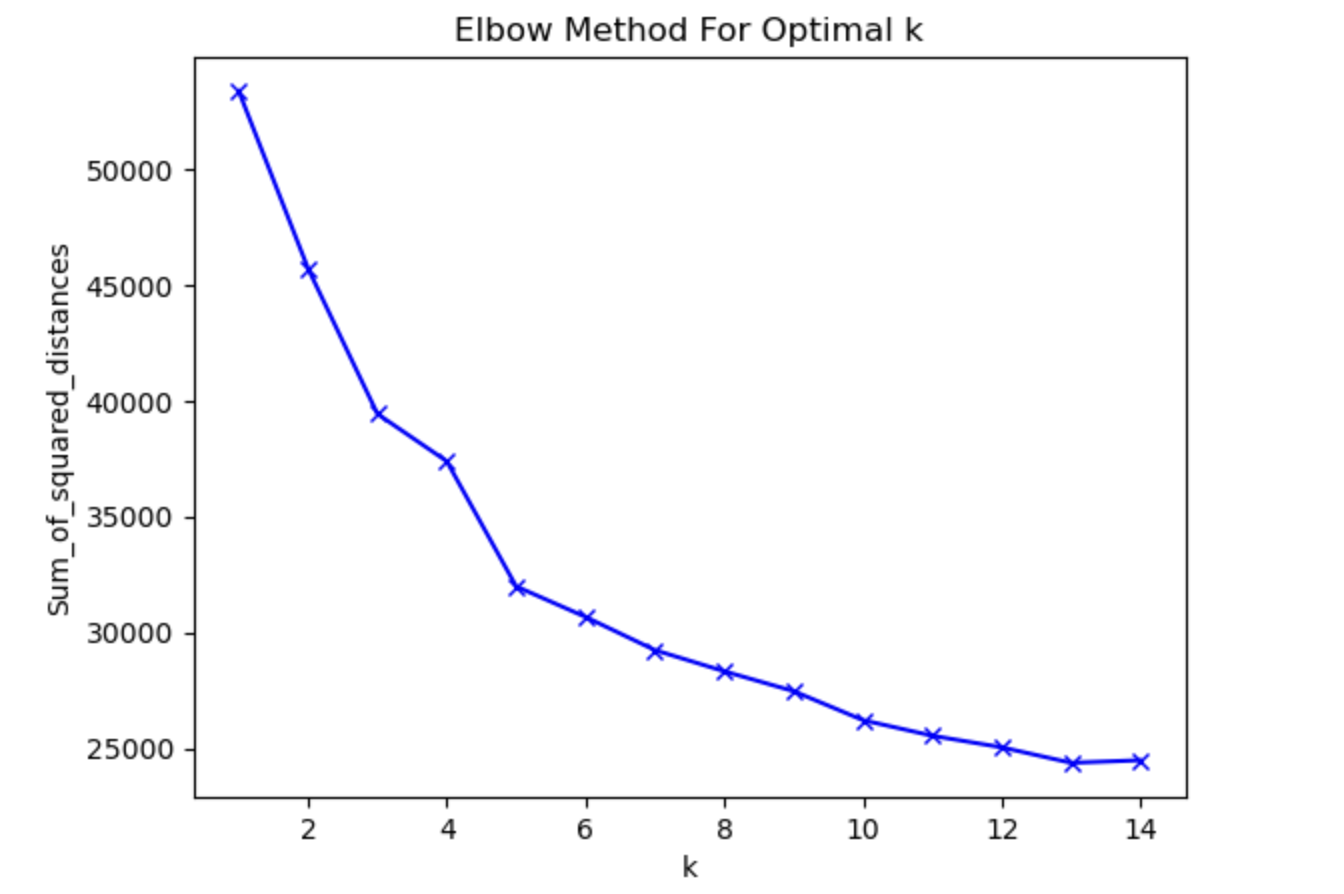

#### 8.3 Between-Cluster Squares 

In [ ]:
import numpy as np
def elbow(dataframe, n):
    kMeansVar = [KMeans(n_clusters=k).fit(dataframe.values) for k in range(1, n)] #making use of list comprehensions.
    centroids = [X.cluster_centers_ for X in kMeansVar]
    k_euclid = [cdist(dataframe.values, cent) for cent in centroids]
    dist = [np.min(ke, axis=1) for ke in k_euclid]
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(dataframe.values)**2)/dataframe.values.shape[0]
    bss = tss - wcss
    plt.plot(bss)
    plt.show()
 
elbow(z_score_df,15)

In [ ]:
# KMeans with 5 clusters, after the validation with the Elbow method.
kmeans = KMeans(n_clusters=5)
kmeans.fit(z_score_df)
labels = kmeans.predict(z_score_df)
cluster_centres = kmeans.cluster_centers_

z_score_df['Cluster'] = kmeans.labels_
plt.hist(labels)

### 9. Evaluating and Interpreting Cluster Centres
Evaluate your cluster groups (e.g., using PCA) and interpret your cluster centres. Describe your results and repeat the process to adjust the variable selection and cluster groups to provide more meaningful results for your geodemographic goal. Interpret the characteristics of each cluster. What demographic patterns or similarities are prevalent within each group?

#### 9.1 Using PCA 

In [ ]:
# Code based on the example provided here: 
# https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html#sphx-glr-auto-examples-decomposition-plot-pca-iris-py

import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(12, 8))

kmeans = KMeans(n_clusters=5) # Based on the 
clusters = kmeans.fit_predict(z_score_df)

z_score_df['Cluster'] = clusters

scaler = StandardScaler()
stand_data_scaled = scaler.fit_transform(z_score_df)

# PCA analysys.
pca = PCA(n_components=2).fit(stand_data_scaled)
pca_result = pca.transform(stand_data_scaled)

#Percentage of variance explained by each of the selected components.
variance_ratio = pca.explained_variance_ratio_

# Create a scatter plot
fig = px.scatter(x=pca_result[:, 0], y=pca_result[:, 1], color=clusters,
                 labels={'color': 'Cluster'},
                 #title='Cluster Plot against 1st 2 Principal Components',
                 opacity=0.7,
                 width=800, 
                 height=800)

plt.tight_layout()
fig.show()

print(f"These two components explain {(variance_ratio.sum()*100):.2f}% of the point variability.")


In [ ]:
# Here is a static figure with the point variability included in the x/y-axis label.
# So we can see what variability is provided by each component.

kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(z_score_df)

z_score_df['Cluster'] = clusters

# Standardize the data for PCA
scaler = StandardScaler()
stand_data_scaled = scaler.fit_transform(z_score_df)

# PCA
pca = PCA(n_components=2).fit(stand_data_scaled)
pca_result = pca.transform(stand_data_scaled)

#Percentage of variance explained by each of the selected components.
variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters, palette='viridis', s=50, alpha=0.7)
plt.title('Cluster Plot against 1st 2 Principal Components')
plt.xlabel(f'Principal Component 1 variation: {variance_ratio[0]*100:.2f}%')
plt.ylabel(f'Principal Component 2 variation: {variance_ratio[1]*100:.2f}%')
plt.legend(title='Clusters')
plt.show()

The principal component variations are 22.92 and 15.5 percent respectively. There is a wider range of data in the 0 cluster as well as overlap between the 3rd and 4th clusters. 

#### 9.2 Interpreting Clusters 

In [ ]:
# Assigning a cluster value to each OA 
kmeans = KMeans(n_clusters=5) # Based on the elbow method, I'm using k = 5 
clusters = kmeans.fit_predict(z_score_df)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_


# Get the cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=z_score_df.columns)

# Create a new DataFrame with cluster assignments and column names
#result_df = pd.DataFrame({'Cluster': clusters, 'Column': z_score_df.columns})

cluster_centers.head(5)

##### Cluster 0 - 25-34 Educated Employed Urbanites

In [ ]:
# plotting the clusters ti find out their unique characteristics 

first_row_centers = cluster_centers.iloc[0, :]

# len of features
num_features = len(first_row_centers)

# polar coordinates
theta = np.linspace(0, 2 * np.pi, num_features, endpoint=True)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, first_row_centers, linewidth=1, color='blue', marker='o', label='Centers')
# Add an extra red line at the 0.0 value
ax.plot(theta, np.zeros_like(first_row_centers), color='red', linestyle='--', label='Avarage')

ax.set_xticks(theta)
ax.set_xticklabels(cluster_centers.columns, rotation=45, ha='right')

plt.show()
#Ignore the cluster polar values, and focus in the census variables.

I labeled this first cluster (0) 25-34 Educated Employed Urbanites because of the above average distribution of ages 25 to 34, the lower than average number of two cars, and the above average employment rates. 

##### Cluster 1 - Secondary School Graduates in Employment 

In [ ]:
second_row_centers = cluster_centers.iloc[1, :] # Changing the index so that it calls the second cluster (meaning index 1) 

# len of features
num_features = len(second_row_centers)

# polar coordinates
theta = np.linspace(0, 2 * np.pi, num_features, endpoint=True)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, second_row_centers, linewidth=1, color='blue', marker='o', label='Centers')
# Add an extra red line at the 0.0 value
ax.plot(theta, np.zeros_like(second_row_centers), color='red', linestyle='--', label='Avarage')

ax.set_xticks(theta)
ax.set_xticklabels(cluster_centers.columns, rotation=45, ha='right')

plt.show()


The characteristics of the second cluster are aged 25 to 34 and secondary school graduates in employment. There are very low rates of education level above 3, and employment is mostly average with no student workers. Moreover, they have mostly average age distribution and are slightly more male than female. 

##### Cluster 2 - Urban Religiously Diverse Students 

In [ ]:
third_row_centers = cluster_centers.iloc[2, :] # Changing the index so that it calls the third cluster (meaning index 2) 

# len of features
num_features = len(third_row_centers)

# polar coordinates
theta = np.linspace(0, 2 * np.pi, num_features, endpoint=True)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, third_row_centers, linewidth=1, color='blue', marker='o', label='Centers')
# Add an extra red line at the 0.0 value
ax.plot(theta, np.zeros_like(third_row_centers), color='red', linestyle='--', label='Avarage')

ax.set_xticks(theta)
ax.set_xticklabels(cluster_centers.columns, rotation=45, ha='right')

plt.show()

This cluster is mostly students who belong to a religious minority. They are predominantly in secondary school or pursuing it. 

##### Cluster 3 - Employed suburbanites 

In [ ]:
fourth_row_centers = cluster_centers.iloc[3, :] # Changing the index so that it calls the fourth cluster (meaning index 3) 

# len of features
num_features = len(fourth_row_centers)

# polar coordinates
theta = np.linspace(0, 2 * np.pi, num_features, endpoint=True)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, fourth_row_centers, linewidth=1, color='blue', marker='o', label='Centers')
# Add an extra red line at the 0.0 value
ax.plot(theta, np.zeros_like(fourth_row_centers), color='red', linestyle='--', label='Avarage')

ax.set_xticks(theta)
ax.set_xticklabels(cluster_centers.columns, rotation=45, ha='right')

plt.show()

This cluster reflects employed professionals who have two cars and likely live closer to suburban areas. They also represetna  smaller proportion of the population (based on the below averge numbers of all age groups) and are more likely to be Christian. 

##### Cluster 4 - Young working Urbanites with Level 3 Qualifications 

In [ ]:
fifth_row_centers = cluster_centers.iloc[4, :] # Changing the index so that it calls the fourth cluster (meaning index 3) 

# len of features
num_features = len(fifth_row_centers)

# polar coordinates
theta = np.linspace(0, 2 * np.pi, num_features, endpoint=True)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, fifth_row_centers, linewidth=1, color='blue', marker='o', label='Centers')
# Add an extra red line at the 0.0 value
ax.plot(theta, np.zeros_like(fifth_row_centers), color='red', linestyle='--', label='Avarage')

ax.set_xticks(theta)
ax.set_xticklabels(cluster_centers.columns, rotation=45, ha='right')

plt.show()

These are an overwhelmingly young demographic of the population in their early 20s. They are more likely to be students. They are slightly more female and are either still attaining degrees or working professionally. They are also slightly less likely to be religious. 

Here is a list of all the labelled clusters based on their characteristics: 
1. Cluster 0: 25-34 Educated Employed Urbanites
2. Cluster 1: Secondary School Graduates in Employment 
3. Cluster 2: Urban Religiously Diverse Students 
4. Cluster 3: Employed suburbanites 
5. Cluster 4: Young working Urbanites with Level 3 Qualifications 

### 10. Mapping the clusters 

In [ ]:
list(z_score_df.columns)

In [ ]:
z_score_df.drop(['35to39',
 '20to24',
 '25to29',
 '30to34',
 'No_Religion',
 'Christian',
 'Male',
 'One_Car',
 'Two_Cars',
 'Married',
 'Employed_Student',
 'Unemployed_Student',
 'Employed_Professional',
 'Unemployed_Professional',
 'Edulvl3',
 'Edulvl≥4'], axis=1, inplace=True)
z_score_df.info()

In [ ]:
# Concatenate the resulting tables.
final_df = pd.concat([birmingham_census_data, z_score_df], axis=1, ignore_index=False)
final_df.head()

In [ ]:
final_df.columns

In [ ]:
final_df.explore(column='Cluster', cmap='Set2', tiles='CartoDB positron') 

### 11. Naming and Final Map 
 Task: Finish the analysis by naming the final clusters and plotting a final map that includes the census values and the provided names.

 Based on the analysis earlier for each of the clusters, I determined the categories to be as follows: 
1. Cluster 0: 25-34 Educated Employed Urbanites
2. Cluster 1: Secondary School Graduates in Employment 
3. Cluster 2: Urban Religiously Diverse Students 
4. Cluster 3: Employed suburbanites 
5. Cluster 4: Young working Urbanites with Level 3 Qualifications

However, this is not based in the classifications that are widely used and likely reflect my own personal perspective of the data. Based on the documentation [here](https://webarchive.nationalarchives.gov.uk/ukgwa/20160105160709/http://www.ons.gov.uk/ons/guide-method/geography/products/area-classifications/ns-area-classifications/ns-2011-area-classifications/pen-portraits-and-radial-plots/pen-portraits-oa.pdf), I'm going to edit these to best reflect the categories provided. 

Here are the new names based on the documentation. 
1. Cluster 0: Urban professionals and families
* The population of this group shows a noticeably higher proportion of children aged 0 to 14 than the parent supergroup and a lower proportion aged 90 and over. There is also a higher proportion of people with mixed ethnicity. Households in this group are more likely to live in terraced properties and to live in privately rented accommodation. Unemployment is slightly higher than for the parent supergroup.
2. Cluster 1:Commuters with young families
* The population of this subgroup has a lower proportion of people who are of Pakistani ethnicity, but a higher proportion of Black ethnicity when compared with the group. Households are more likely to live in flats and to live in overcrowded conditions. People are more likely to work in the information and communication, and financial related industries.
3. Cluster 2: Inner City Students
* The age profile of this group shows a high proportion of schoolchildren, full-time students, and people aged 25 to 44, though a lower proportion married or divorced. Households are more likely to live in flats, to live in private rented accommodation, and to have overcrowded conditions. A lower proportion of people provide unpaid care, and a higher proportion work in accommodation or food service activities industries.  
4. Cluster 3: Suburban Achievers
* When compared with the parent supergroup a higher proportion of households live in detached properties and flats, and are less likely to rent their accommodation or live in overcrowded conditions. People of Indian ethnicity are over-represented when compared with the supergroup. Higher proportions of people have higher qualifications, and are more likely to work in the information and communication, and financial related industries. 
5. Cluster 4: Comfortable Cosmopolitans
* The age profile of this group shows a higher proportion of people age 45 and over than the parent supergroup. A higher proportion of people are divorced. There is a lower representation for all nonWhite ethnic groups when compared with the supergroup and a lower proportion of people born in the old EU. There is a lower proportion of households with full-time students and a higher proportion who live in flats. A higher proportion of workers are employed in the mining and manufacturing industries, and travel to work using private transport.

While the data used for the classification is not the same as the data that these sub-groups are classified by, there are significant factors that are telling, such as employment, car availability, education attainment status, and age that allowed me to approximate these categories. 

In [ ]:
def rename_column(x): 
    x = str(x)  # Convert integer to string
    x = x.replace("0", "Urban professionals and families") # Replacing for the categories defined earlier. 
    x = x.replace("1", "Commuters with young families")
    x = x.replace("2", "Inner City Students")
    x = x.replace("3", "Suburban Achievers")
    x = x.replace("4", "Comfortable Cosmopolitans")
    return x

final_df['Cluster'] = final_df['Cluster'].apply(rename_column)

In [ ]:
final_df.explore(column='Cluster', cmap='Set1', tiles='CartoDB positron')

### 12. Challenges and Insights
Finally, acknowledge the subjective nature of classification and make analytical decisions to produce an optimum classification for your specific purpose. Reflect on the challenges and insights gained during the classification process. Ensure you document your analytical decisions and the rationale behind any important decision. Once your geodemographics are constructed, describe the potential use cases for the geodemographic classification you have built based on your initial goal



#### 12.1 Challenges and Insights 
To start with the challenges, defining the characteristics of a cluster was difficult to assess. The word choice and the most important factors to identity cluster by seemed to be reductive in light of all the data analysed. Moreover, by creating these categories, I felt that residents who were in the minority within these OAs were not accounted for. 
Applying the categories to a more limited subset of the census data (ie a certain age range, etc.) made it difficult to determine which of the population subgroup defnitions were appropriate. Likely, ground-truthing and qualitative interviews would need to be conducted to verify the geodemographic data presented. 

In term of insights, there are clear spatially distributed patterns of suburban achievers on the outskirts of Birmingham. Commuters with families also made up a large marjority of the OAs, but despite this, there are clear areas that are predominantly younger students and comfortable cosmopolitans. 

#### 12.2 Potential Use Cases 
In choosing the variables to make this classification, I had in mind a younger demographic, particularly for use by an advertising agency. This informed my selection of the age demographic and the availability of transportation. For example, any advertisements for a cologne or perfume brand would likely want to know the education level and employment type of the people in certain neighborhoods; this would inform the word choice used in advertising. Additionally, knowing whether people are commuters or not will inform the placement of advertisements. To advertise a cologne/perfume to the Suburban Achievers cluster, agencies might decide to invest more in large billboards by roadways. On the other hand, if the target audience are students, understanding their employment type and their spatial distrubution would make for more effective ads and inform their pricing calculations. This can aid the company or brand by providing an understanding of who their consumers are and what values they might share. 

Another potential use case for this is for public health interventions. For example, if there is a public health intervention on sexual health and STI testing, understanding the employment type, language preference/understanding, and income would be very relevant factors for targeting certain interventions and for defining the promotional material used. Interventions on public health issues would also be different for families versus single persons, and might need to reflect employment type and whether the population is a student or not. 